In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/picarro_calculator/picarro-calculator


In [2]:
import Picarro as pica
import PicarroDatabase as pdb
import pickle

In [7]:
files = pdb.checkforrawdata("example_data/")

new file ['example_data/HKDS2009_IsoWater_20190108_113825.csv', 'example_data/HKDS2009_IsoWater_20191119_101154.csv', 'example_data/HKDS2009_IsoWater_20191005_095530.csv', 'example_data/HKDS2009_IsoWater_20191103_093239.csv', 'example_data/HKDS2009_IsoWater_20191004_103528.csv', 'example_data/HKDS2009_IsoWater_20191015_094044.csv', 'example_data/HKDS2009_IsoWater_20191102_111519.csv', 'example_data/HKDS2009_IsoWater_20191114_105042.csv', 'example_data/HKDS2009_IsoWater_20191106_083502.csv', 'example_data/HKDS2009_IsoWater_20191117_122133.csv', 'example_data/HKDS2009_IsoWater_20191018_094838.csv', 'example_data/HKDS2009_IsoWater_20191118_103014.csv', 'example_data/HKDS2009_IsoWater_20191009_110451.csv', 'example_data/HKDS2009_IsoWater_20191116_120411.csv', 'example_data/HKDS2009_IsoWater_20191104_084429.csv', 'example_data/HKDS2009_IsoWater_20191010_094459.csv', 'example_data/HKDS2009_IsoWater_20191014_075543.csv', 'example_data/HKDS2009_IsoWater_20191031_101623.csv']


In [8]:
conn = pdb.CreateConnection('database/isotopes.db')

for file in files:
    pdb.AddSummaryRun(file,conn)
    pdb.AddRaw(file,conn)

Running the corrections for Oxygen 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type


/Users/AchilleTalon/miniconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


9097.0
Checking: LW17 ...
Standard dev is good
9118.0
Checking: LW11 ...
Standard dev is good
9111.0
Checking: LW4 ...
get rid of measurements  0 and 1
9104.0
Checking: LW8 ...
Standard dev too high get rid of measurement 1
9108.0
Checking: LW13 ...
Standard dev too high get rid of measurement 4
9114.0
Checking: LW5 ...
get rid of measurements  2 and 3
9105.0
Checking: LW6 ...
Standard dev too high get rid of measurement 4
9106.0
9095.0
9098.0
Checking: LW16 ...
Standard dev is good
9117.0
Checking: LW18 ...
Standard dev too high get rid of measurement 4
9119.0
Checking: LW3 ...
Standard dev too high get rid of measurement 1
9102.0
Checking: LW15 ...
Standard dev too high get rid of measurement 4
9116.0
Checking: LW1 ...
get rid of measurements  2 and 3
9100.0
Checking: LW10 ...
Standard dev is good
9110.0
Checking: LW9 ...
get rid of measurements  0 and 1
9109.0
Checking: LW2 ...
get rid of measurements  3 and 0
9101.0
Checking: LW19 ...
Standard dev too high get rid of measurement 1


/Users/AchilleTalon/miniconda3/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


9097.0
Checking: LW17 ...
Standard dev is good
9118.0
Checking: LW11 ...
Standard dev is good
9111.0
Checking: LW4 ...
Standard dev too high get rid of measurement 4
9104.0
Checking: LW8 ...
Standard dev is good
9108.0
Checking: LW13 ...
Standard dev too high get rid of measurement 4
9114.0
Checking: LW5 ...
Standard dev too high get rid of measurement 2
9105.0
Checking: LW6 ...
Standard dev too high get rid of measurement 4
9106.0
9095.0
9098.0
Checking: LW16 ...
Standard dev is good
9117.0
Checking: LW18 ...
Standard dev is good
9119.0
Checking: LW3 ...
Standard dev is good
9102.0
Checking: LW15 ...
Standard dev is good
9116.0
Checking: LW1 ...
get rid of measurements  1 and 2
9100.0
Checking: LW10 ...
Standard dev is good
9110.0
Checking: LW9 ...
Standard dev too high get rid of measurement 3
9109.0
Checking: LW2 ...
get rid of measurements  3 and 0
9101.0
Checking: LW19 ...
Standard dev too high get rid of measurement 1
9120.0
Checking: LW14 ...
Standard dev too high get rid of mea

10238.0
Checking: ShT-239 ...
Standard dev too high get rid of measurement 2
10253.0
Checking: ShT-255 ...
too high std. deviation
10250.0
Checking: ShT-256-1 ...
Standard dev is good
10252.0
Checking: ShT-240 ...
Standard dev too high get rid of measurement 1
10254.0
Checking: ShT-252 ...
get rid of measurements  2 and 3
10245.0
Checking: ShT-250 ...
Standard dev too high get rid of measurement 1
10242.0
Checking: ShT-262 ...
Standard dev too high get rid of measurement 2
10236.0
10230.0
Done!
Directory already exists
Summary data file already exists!
Run summary already exists
now merging the O and H isotope data 
 ... 
 ...
Checking for triplicates...
Some samples were not triplicated
key
10242.0     ShT-250
10245.0     ShT-252
10234.0     ShT-260
10240.0    ShT-270d
Name: Identifier 1, dtype: object


Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
key
10232.0         TAP
10233.0         W22
10238.0     ShT-263
10

10202.0
10205.0
Checking: ShT-276a ...
get rid of measurements  2 and 3
10222.0
Checking: ShT-273 ...
Standard dev is good
10216.0
Checking: Sp-17-08-1 ...
Standard dev too high get rid of measurement 1
10213.0
Checking: ShT-277 ...
Standard dev is good
10223.0
Checking: ShT-272 ...
get rid of measurements  2 and 3
10214.0
Checking: ShT-274d ...
Standard dev too high get rid of measurement 1
10217.0
Checking: Sp-18-03-1 ...
too high std. deviation
10207.0
Checking: Sp-18-02-3 ...
Standard dev too high get rid of measurement 1
10211.0
Checking: Chp 17-06 ...
get rid of measurements  2 and 3
10208.0
10203.0
Done!
Directory already exists
Summary data file already exists!
Run summary already exists
now merging the O and H isotope data 
 ... 
 ...
Checking for triplicates...
Some samples were not triplicated
key
10207.0    Sp-18-03-1
10213.0    Sp-17-08-1
10222.0      ShT-276a
10223.0       ShT-277
10208.0     Chp 17-06
10214.0       ShT-272
10218.0       ShT-275
10226.0       ShT-258
Name

table runs already exists
Running the corrections for Oxygen 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type
11176.0
Checking: MSK ...
Standard dev too high get rid of measurement 1
11179.0
Checking: Sp-18-03-2 ...
Standard dev too high get rid of measurement 1
11184.0
Checking: Sp-18-06-2 ...
get rid of measurements  1 and 2
11183.0
Checking: Rus-3_low ...
get rid of measurements  1 and 3
11199.0
Checking: chp-18-05 ...
Standard dev too high get rid of measurement 3
11196.0
Checking: Sp-18-02-1 ...
Standard dev is good
11188.0
Checking: Sp-17-06-3 ...
get rid of measurements  0 and 1
11194.0
Checking: MSK-4 ...
Standard dev is good
11180.0
Checking: Sp-18-07-2 ...
get rid of measurements  0 and 1
11186.0
11174.0
11177.0
Checking: chp-18-07 ...
Standard dev too high get rid of measureme

11257.0
Checking: Sverd-verh-10-19 ...
Standard dev is good
11265.0
Checking: H10-18 ...
Standard dev too high get rid of measurement 1
11278.0
Checking: Podz-10-19 ...
Standard dev is good
11262.0
Checking: Kapel-suh-z-10-19 ...
Standard dev is good
11269.0
Checking: Sverd-niz-10-19 ...
Standard dev is good
11266.0
Checking: L11-18 ...
Standard dev too high get rid of measurement 2
11271.0
Checking: L02-19 ...
Standard dev is good
11275.0
Checking: L03-19 ...
Standard dev too high get rid of measurement 1
11276.0
Checking: H12-18 ...
Standard dev too high get rid of measurement 1
11280.0
Checking: L01-19 ...
Standard dev is good
11274.0
11255.0
11258.0
Checking: H11-18 ...
Standard dev too high get rid of measurement 1
11279.0
Checking: L12-18 ...
get rid of measurements  2 and 3
11273.0
Checking: L10-18 ...
Standard dev is good
11270.0
Checking: L04-19 ...
Standard dev too high get rid of measurement 1
11277.0
Checking: Ars-10-19 ...
Standard dev is good
11261.0
Checking: B.zal-niz-1

Checking: os-KLP-10-19-WH ...
Standard dev too high get rid of measurement 1
11305.0
Checking: 1grv-19 ...
Standard dev too high get rid of measurement 1
11295.0
Checking: H02-19 ...
Standard dev too high get rid of measurement 1
11288.0
Checking: 1bb-19 ...
Standard dev is good
11302.0
Checking: os-Nirob-04-19-WH ...
Standard dev too high get rid of measurement 1
11306.0
Checking: 1bnv-19 ...
Standard dev is good
11293.0
Checking: 1vbk-19 ...
Standard dev is good
11304.0
11283.0
Done! 
 ... 
 ...
 ... 
 ...
Running the corrections for Deuterium 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type
11284.0
Checking: H04-19 ...
Standard dev is good
11291.0
Checking: H03-19 ...
Standard dev is good
11289.0
Checking: 1xd-19 ...
get rid of measurements  2 and 3
11298.0
Checking: 2trv-19 ...
Stand

 ...
Running the corrections for Deuterium 
 ... 
 ...
Cannot convert column Analysis to numeric type
Cannot convert column Time Code to numeric type
Cannot convert column Port to numeric type
Cannot convert column Gas Configuration to numeric type
Cannot convert column Method to numeric type
11230.0
Checking: os-KLP-10-19 ...
Standard dev is good
11241.0
Checking: os-Nirob-05-19 ...
get rid of measurements  1 and 2
11243.0
Checking: os-Perm-08-19 ...
Standard dev too high get rid of measurement 1
11252.0
Checking: os-KLP-03-19 ...
get rid of measurements  2 and 3
11233.0
Checking: os-Nirob-07-19 ...
get rid of measurements  2 and 3
11246.0
Checking: os-KLP-08-19 ...
Standard dev is good
11239.0
Checking: os-Perm-05-19 ...
Standard dev is good
11249.0
Checking: os-Nirob-06-19 ...
Standard dev is good
11244.0
Checking: os-KLP-09-19 ...
Standard dev too high get rid of measurement 1
11240.0
Checking: os-Perm-06-19 ...
Standard dev is good
11250.0
Checking: os-Nirob-04-19 ...
Standard dev

Checking: GNS-11 ...
Standard dev is good
10379.0
Checking: GNS-06 ...
Standard dev is good
10374.0
Checking: GNS-19 ...
get rid of measurements  2 and 3
10386.0
Checking: GNS-08 ...
Standard dev is good
10376.0
Checking: GNS-09 ...
Standard dev is good
10377.0
Checking: GNS-05 ...
Standard dev is good
10373.0
Checking: GNS-13 ...
Standard dev too high get rid of measurement 1
10382.0
Checking: GNS-22 ...
Standard dev is good
10389.0
Checking: GNS-12 ...
Standard dev is good
10380.0
Checking: GNS-16 ...
Standard dev too high get rid of measurement 4
10384.0
10365.0
Done!
Directory already exists
Summary data file already exists!
Run summary already exists
now merging the O and H isotope data 
 ... 
 ...
Checking for triplicates...
Some samples were not triplicated
key
10378.0    GNS-10
10379.0    GNS-11
10386.0    GNS-19
10387.0    GNS-20
10388.0    GNS-21
Name: Identifier 1, dtype: object


Checking for high standard deviations ...
Suggested reruns for following samples, which had hig

now merging the O and H isotope data 
 ... 
 ...
Checking for triplicates...
Some samples were not triplicated
key
10857.0    Chp-18-12
10862.0    Chp-19-04
10869.0        MSK 3
10874.0      Bshap 4
Name: Identifier 1, dtype: object


Checking for high standard deviations ...
Suggested reruns for following samples, which had high standard deviations
key
10853.0        TAP
10854.0        W22
10867.0        TAP
10869.0      MSK 3
10852.0      HAUS2
10858.0        TAP
10874.0    Bshap 4
10876.0        TAP
Name: Identifier 1, dtype: object


Checking for samples lying outside of the GWML ...
Suggested reruns for following samples, which were outside of the GMWL
key
10851.0         HAUS1
10855.0    Sp-19-08-2
10856.0     Chp-18-10
Name: Identifier 1, dtype: object


table rawrun already exists


In [ ]:
#pdb.AddSummaryRun("example_data/HKDS2009_IsoWater_20191005_095530.csv",conn)

In [9]:
import pandas as pd

In [37]:
df = pd.read_sql_query("select * from runs;",conn)

In [ ]:
x1 = df.where(df["Identifier 1"]=="TAP").dropna()
x2 = df.where(df["Identifier 1"]=="HAUS2").dropna()
x3 = df.where(df["Identifier 1"]=="HAUS1").dropna()



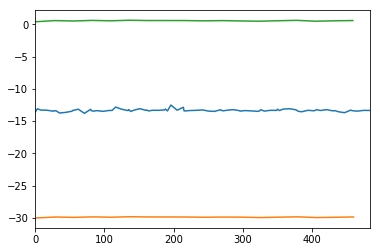

In [36]:
x1["d18O vsmow"].plot()
x2["d18O vsmow"].plot()
x3["d18O vsmow"].plot()